In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

C:\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# load the data from csv to pandas Data Frame
car_price = pd.read_csv('./CarPrice_Assignment.csv',engine='python')

In [3]:
# Print the column information
print(car_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
# Describe the columns
print(car_price.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

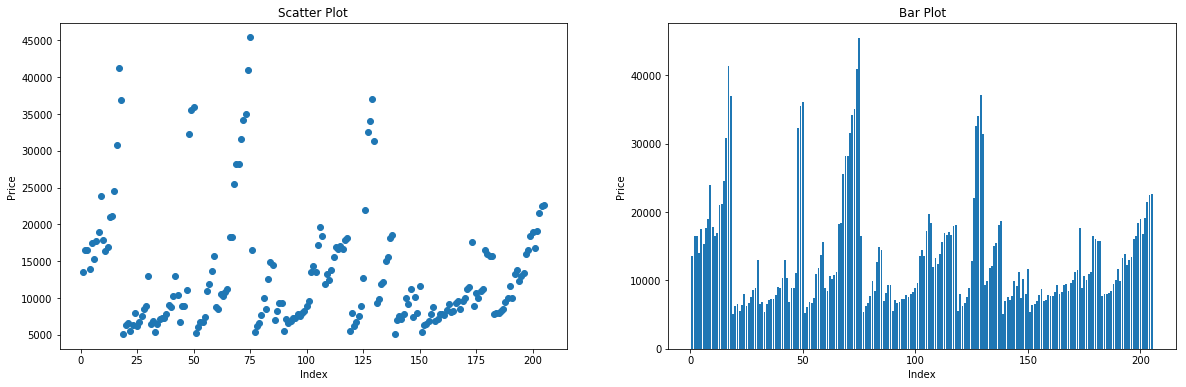

In [5]:
# Plotting the price scatter & bar plot to view the data spread
plt.figure(figsize=(20,6))
x_val = [x for x in range(1,206,1)]
plt.subplot(121)
plt.scatter(x=x_val,y=car_price['price'])
plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Price')
plt.subplot(122)
plt.bar(x_val,car_price['price'])
plt.title('Bar Plot')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

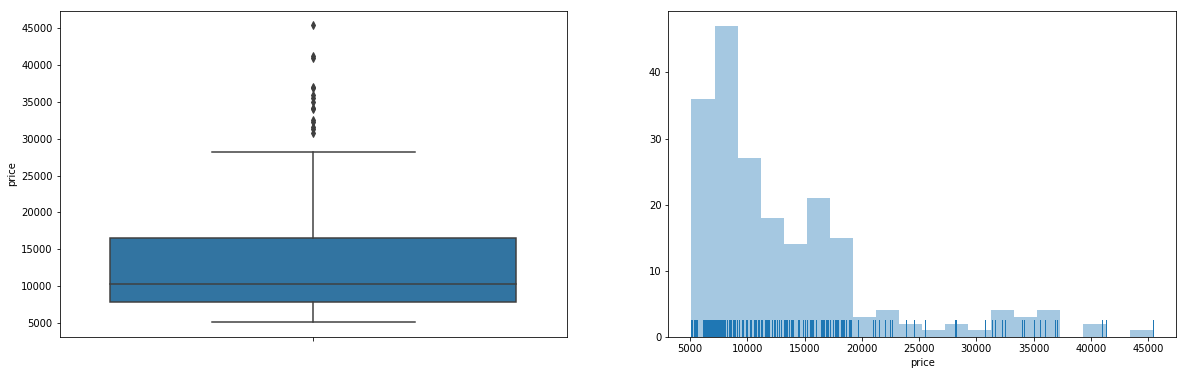

In [6]:
plt.figure(figsize=(20,6))
x_val = [x for x in range(1,206,1)]
plt.subplot(121)
sns.boxplot(y=car_price['price'])
plt.subplot(122)
sns.distplot(car_price['price'], bins=20, kde=False, rug=True)
plt.show()

In [7]:
car_price['price'].quantile([0.1,0.25,0.5,0.75,0.9,0.95,0.99,1.0])

0.10     6657.00
0.25     7788.00
0.50    10295.00
0.75    16503.00
0.90    22563.00
0.95    32472.40
0.99    40802.72
1.00    45400.00
Name: price, dtype: float64

In [8]:
# outlier treatment for Price with 0.99 quqntile
car_price.loc[(car_price['price'] > 40802.72),['price']] = 40802.72

In [9]:
# Getting feel of data before splitting it up.
car_price['CarName'].head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [10]:
car_price['CarName'] = car_price['CarName'].astype('str').str.split(' ').str[0].str.lower()

In [11]:
# Data correction for company name where it is misspelt.
# maxda is mazda
# porcshce is porsche
# vokswagen, vw is volkswagen
# toyouta is toyota
#car_price.loc[(car_price['CarName'] == 'maxda'),'CarName']='mazda'

car_price['CarName'].replace({'maxda':'mazda','porcshce':'porsche','vokswagen':'volkswagen','vw':'volkswagen','toyouta':'toyota'},inplace=True)

In [12]:
# Mapping the categorical variables with 2 categories to boolean values 0/1
car_price['fueltype'] = car_price['fueltype'].map({'gas':0,'diesel':1})
car_price['aspiration'] = car_price['aspiration'].map({'std':0,'turbo':1})
car_price['doornumber'] = car_price['doornumber'].map({'two':0,'four':1})
car_price['enginelocation'] = car_price['enginelocation'].map({'front':0,'rear':1})

In [13]:
# Dropping the columns that doesn't any significance for analysis
car_price.drop('car_ID',inplace=True,axis=1)
# Dropping duplicate records if any
car_price.drop_duplicates(inplace=True)

In [14]:
# Getting the average price of car by brand
pd.pivot_table(car_price,values='price',columns='CarName',aggfunc=('mean','count','sum','std'),fill_value=0).transpose().sort_values(['mean','count'],ascending=False)[:10]

,count,mean,std,sum
CarName,,,,
jaguar,3.0,34600.000000,2047.559523,103800.000
buick,8.0,33052.680000,5740.294335,264421.440
porsche,5.0,31400.500000,5654.093097,157002.500
bmw,8.0,26054.715000,9144.789653,208437.720
volvo,11.0,18063.181818,3314.650263,198695.000
audi,7.0,17859.166714,3151.576876,125014.167
mercury,1.0,16503.000000,0.000000,16503.000
alfa-romero,3.0,15498.333333,1734.937559,46495.000
peugeot,11.0,15489.090909,2246.749673,170380.000


In [15]:
# Getting price value by car body type.
pd.pivot_table(car_price,values='price',columns='carbody',aggfunc=('mean','count','sum','std')).transpose().sort_values(['mean','count'],ascending=False)[:10]

,count,mean,std,sum
carbody,,,,
convertible,6.0,21890.500000,11187.802193,131343.000
hardtop,8.0,21633.840000,13566.238358,173070.720
sedan,96.0,14337.296250,8448.262158,1376380.440
wagon,25.0,12371.960000,5120.948695,309299.000
hatchback,70.0,10376.652386,4909.641988,726365.667


In [16]:
print(car_price.head())

   symboling      CarName  fueltype  aspiration  doornumber      carbody  \
0          3  alfa-romero         0           0           0  convertible   
1          3  alfa-romero         0           0           0  convertible   
2          1  alfa-romero         0           0           0    hatchback   
3          2         audi         0           0           1        sedan   
4          2         audi         0           0           1        sedan   

  drivewheel  enginelocation  wheelbase  carlength   ...     enginesize  \
0        rwd               0       88.6      168.8   ...            130   
1        rwd               0       88.6      168.8   ...            130   
2        rwd               0       94.5      171.2   ...            152   
3        fwd               0       99.8      176.6   ...            109   
4        4wd               0       99.4      176.6   ...            136   

   fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  citympg  \
0        mp

# Analysing the predictors / independent variables

## Continuous Independent variables
    wheelbase		
    carlength		
    carwidth		
    carheight		
    curbweight		
    enginesize		
    boreratio		
    stroke		
    compressionratio		
    horsepower		
    peakrpm		
    citympg		
    highwaympg		


## Categorical Independent variables
    Symboling 		
    carCompany		
    fueltype		
    aspiration		
    doornumber		
    carbody		
    drivewheel
    enginelocation		    
    enginetype		
    cylindernumber		    	
    fuelsystem		



In [17]:
# Transforming categorical to dummy variables & concating with car_price dataFrame
carBody = pd.get_dummies(car_price['carbody'],drop_first=True)
car_price = pd.concat([car_price,carBody],axis=1)
car_price.drop(['carbody'],axis=1,inplace=True)

fuelSystem = pd.get_dummies(car_price['fuelsystem'], drop_first=True)
car_price = pd.concat([car_price,fuelSystem],axis=1)
car_price.drop(['fuelsystem'],axis=1,inplace=True)

engineType = pd.get_dummies(car_price['enginetype'], drop_first=True) 
car_price = pd.concat([car_price,engineType],axis=1) 
car_price.drop(['enginetype'],axis=1,inplace=True)

cylinderNumber = pd.get_dummies(car_price['cylindernumber'], drop_first=True)
car_price = pd.concat([car_price,cylinderNumber],axis=1)
car_price.drop(['cylindernumber'],axis=1,inplace=True)

driveWheel = pd.get_dummies(car_price['drivewheel'], drop_first=True) 
car_price = pd.concat([car_price,driveWheel],axis=1) 
car_price.drop(['drivewheel'],axis=1,inplace=True)

symboling = pd.get_dummies(car_price['symboling'], drop_first=True)
car_price = pd.concat([car_price,symboling],axis=1)
car_price.drop(['symboling'],axis=1,inplace=True)

company = pd.get_dummies(car_price['CarName'], drop_first=True)
car_price = pd.concat([car_price,company],axis=1)
car_price.drop(['CarName'],axis=1,inplace=True)

In [18]:
# normalising the data for continuous variables
norm_cols = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
for col in norm_cols:
    mean_col = np.mean(car_price[col])
    max_col = np.max(car_price[col])
    min_col = np.min(car_price[col])
    car_price[col] = car_price[col].apply(lambda x : ( x - mean_col)/(max_col - min_col))

In [19]:
car_price_wp = car_price.drop('price',axis=1)

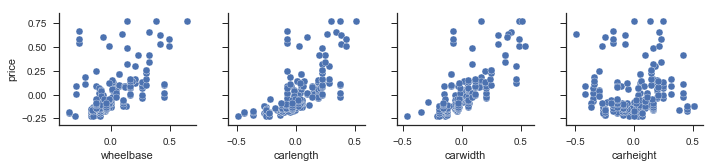

In [20]:
# Plotting continuous independent variables against price to check for linearity
sns.set(style="ticks", color_codes=True)
sns.pairplot(car_price,x_vars=['wheelbase','carlength','carwidth','carheight'],y_vars=['price'])
plt.show()

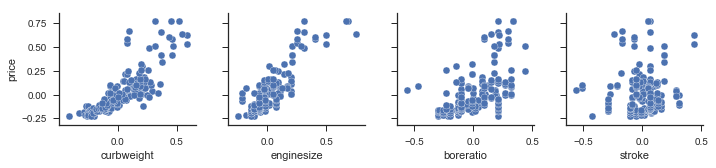

In [21]:
# Plotting continuous independent variables against price to check for linearity
sns.set(style="ticks", color_codes=True)
sns.pairplot(car_price,x_vars=['curbweight','enginesize','boreratio','stroke'],y_vars=['price'])
plt.show()

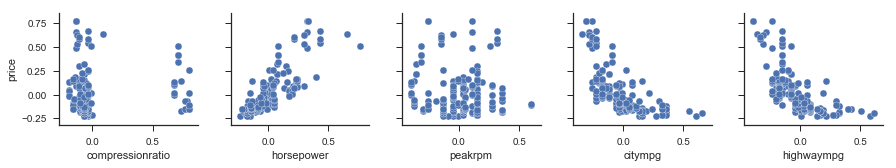

In [22]:
# Plotting continuous independent variables against price to check for linearity
sns.set(style="ticks", color_codes=True)
sns.pairplot(car_price,x_vars=['compressionratio','horsepower','peakrpm','citympg','highwaympg'],y_vars=['price'])
plt.show()

In [23]:
# First MLR run
y_sample = car_price['price']
# Dropping categorical variables to run regression
x_sample = car_price_wp
x_sample_const = sm.add_constant(x_sample)
lr1 = sm.OLS(y_sample,x_sample_const).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     68.58
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           7.43e-81
Time:                        16:01:46   Log-Likelihood:                 375.28
No. Observations:                 205   AIC:                            -620.6
Df Residuals:                     140   BIC:                            -404.6
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0777      0.118  

In [24]:
# UDF for calculating vif value
def vif_cal(input_data):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,len(xvar_names)):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [25]:
vif_cal(x_sample)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,fueltype,inf
59,peugeot,inf
31,ohcf,inf
3,enginelocation,inf
29,l,inf
37,three,inf
39,two,inf
64,subaru,inf
23,idi,inf
33,rotor,inf


From the Coeffieceints that we got from our 1st regression & VIF we found out there are lot of insignificant predictors & multicollinearity is observed. 

We have also used Company as predictor but we should not include them as an predictor because Chinese company is launching new product / brand in US market so it is not wise to include estabilished brand which has an brand equity that carries an brand value attributing to price. So removing them & running our 2nd regression.


In [26]:
# 2 MLR run
x_sample = car_price_wp.drop(company.columns,axis=1)
x_sample_const = sm.add_constant(x_sample)
lr2 = sm.OLS(y_sample,x_sample_const).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     60.37
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.63e-79
Time:                        16:01:47   Log-Likelihood:                 315.67
No. Observations:                 205   AIC:                            -539.3
Df Residuals:                     159   BIC:                            -386.5
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1322      0.104  

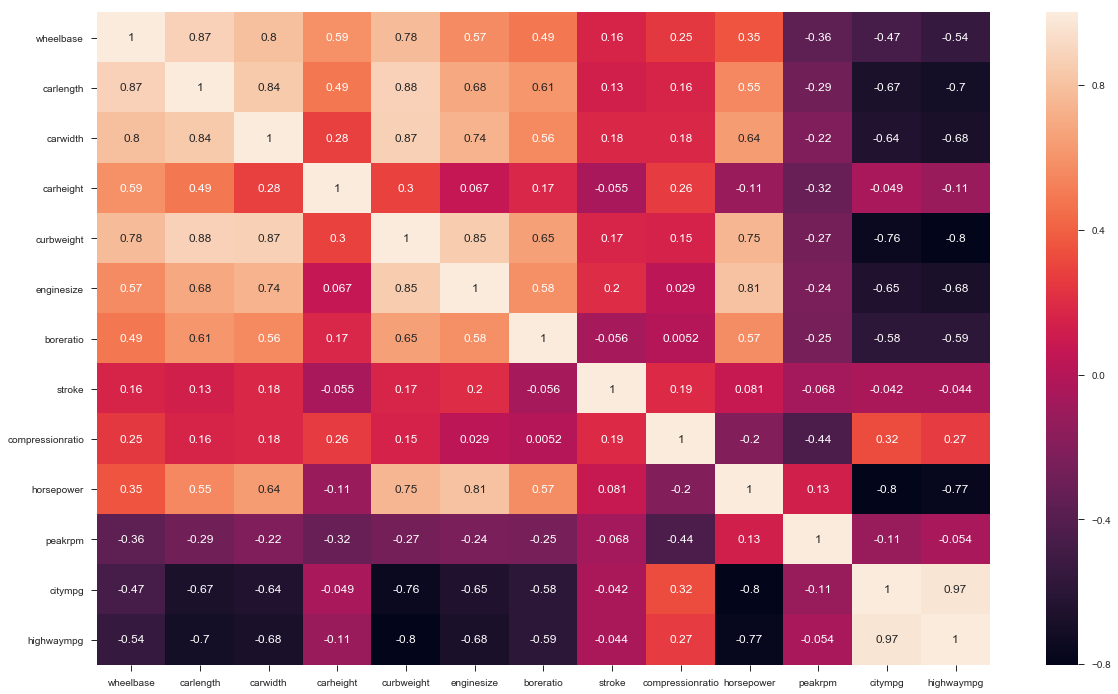

In [27]:
cols=['wheelbase','carlength','carwidth','carheight','curbweight',
      'enginesize','boreratio','stroke','compressionratio','horsepower',
      'peakrpm','citympg','highwaympg']
x_correlated = x_sample[cols]
corr = x_correlated.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.show()

In [28]:
# Dropping independent variables using RFE & then run regression
tlr = LinearRegression()
trfe = RFE(tlr,10)
trfe.fit(x_sample,y_sample)

col = x_sample.columns[trfe.support_]

x_sample_rfe = x_sample[col]
x_sample_rfe_const = sm.add_constant(x_sample_rfe)
#3rd run MLR
lr3 = sm.OLS(y_sample,x_sample_rfe_const).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     165.5
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           2.82e-89
Time:                        16:01:48   Log-Likelihood:                 250.00
No. Observations:                 205   AIC:                            -478.0
Df Residuals:                     194   BIC:                            -441.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1823      0.026      6.

In [29]:
vif_cal(x_sample_rfe)

,Var,Vif
2,curbweight,7.42
3,enginesize,6.99
1,carwidth,5.22
5,ohcv,1.88
8,six,1.87
0,enginelocation,1.43
9,twelve,1.35
6,five,1.30
4,stroke,1.25
7,four,1.20


In [30]:
# removing curbweight as it is having high VIF
# 4th MLR run
x_sample_rfe = x_sample_rfe.drop('curbweight',axis=1)
x_sample_const = sm.add_constant(x_sample_rfe)
lr4 = sm.OLS(y_sample,x_sample_const).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     175.5
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.80e-88
Time:                        16:01:48   Log-Likelihood:                 245.25
No. Observations:                 205   AIC:                            -470.5
Df Residuals:                     195   BIC:                            -437.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1790      0.027      6.

In [31]:
vif_cal(x_sample_rfe)

,Var,Vif
2,enginesize,4.98
1,carwidth,3.23
4,ohcv,1.79
7,six,1.78
0,enginelocation,1.39
8,twelve,1.34
5,five,1.30
3,stroke,1.23
6,four,1.20


In [32]:
# remove twelve as it p-value has become comparatively insignificant & we have multiple cylinder types.
x_sample_rfe = x_sample_rfe.drop('twelve',axis=1)
x_sample_const = sm.add_constant(x_sample_rfe)
lr5 = sm.OLS(y_sample,x_sample_const).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           2.99e-88
Time:                        16:01:48   Log-Likelihood:                 241.91
No. Observations:                 205   AIC:                            -465.8
Df Residuals:                     196   BIC:                            -435.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1684      0.027      6.

In [33]:
vif_cal(x_sample_rfe)

,Var,Vif
2,enginesize,4.20
1,carwidth,3.07
4,ohcv,1.78
7,six,1.66
0,enginelocation,1.39
5,five,1.30
3,stroke,1.18
6,four,1.18


In [34]:
# remove six as there are multiple cylinder types and comparatively it is more insignificant & then run 6th regression
x_sample_rfe = x_sample_rfe.drop('six',axis=1)
x_sample_const = sm.add_constant(x_sample_rfe)
lr6 = sm.OLS(y_sample,x_sample_const).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     211.9
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           4.42e-88
Time:                        16:01:48   Log-Likelihood:                 238.65
No. Observations:                 205   AIC:                            -461.3
Df Residuals:                     197   BIC:                            -434.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1196      0.019      6.

In [35]:
vif_cal(x_sample_rfe)

,Var,Vif
2,enginesize,3.91
1,carwidth,3.02
4,ohcv,1.64
5,five,1.30
0,enginelocation,1.26
3,stroke,1.17
6,four,1.17


In [36]:
# remove five as there are multiple cylinder types and it has become insignificant & then run 7th regression
x_sample_rfe = x_sample_rfe.drop('five',axis=1)
x_sample_const = sm.add_constant(x_sample_rfe)
lr7 = sm.OLS(y_sample,x_sample_const).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     243.5
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.58e-88
Time:                        16:01:48   Log-Likelihood:                 236.81
No. Observations:                 205   AIC:                            -459.6
Df Residuals:                     198   BIC:                            -436.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1003      0.016      6.

In [37]:
vif_cal(x_sample_rfe)

,Var,Vif
2,enginesize,3.73
1,carwidth,2.45
4,ohcv,1.64
0,enginelocation,1.24
5,four,1.16
3,stroke,1.14


## We can see from both regression run & VIF - all remained predictors are significant & doesn't show any multicollinearity. So the model is choosen with below independent predictors / variables:-      
    enginelocation
    carwidth
    enginesize
    stroke
    ohcv
    four

In [38]:
#Getting y_pred from the model
x_sample_rfe_const = sm.add_constant(x_sample_rfe)
y_pred = lr7.predict(x_sample_rfe_const)

Text(0,0.5,'Housing Price')

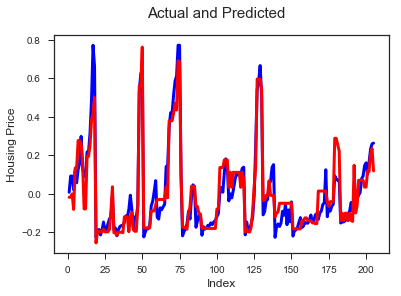

In [39]:
x = [i for i in range(1,206,1)] # generating index 
fig = plt.figure() 
plt.plot(x,y_sample, color="blue", linewidth=3, linestyle="-") #Plotting Actual
plt.plot(x,y_pred, color="red",  linewidth=3, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=12)                               # X-label
plt.ylabel('Housing Price', fontsize=12)                       # Y-label

Text(0,0.5,'ytest-ypred')

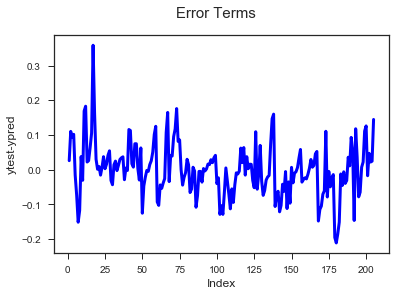

In [40]:
# Error terms
x = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(x,y_sample-y_pred, color="blue", linewidth=3, linestyle="-")
fig.suptitle('Error Terms', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=12)                      # X-label
plt.ylabel('ytest-ypred', fontsize=12)                # Y-label

Text(0,0.5,'y_pred')

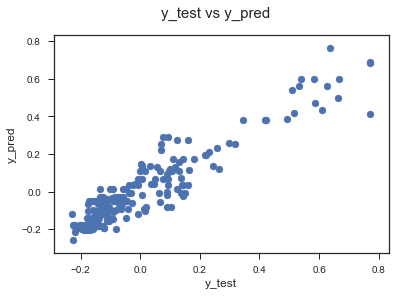

In [41]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_sample,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=15)              # Plot heading 
plt.xlabel('y_test', fontsize=12)                          # X-label
plt.ylabel('y_pred', fontsize=12)                          # Y-label

Text(0,0.5,'Index')

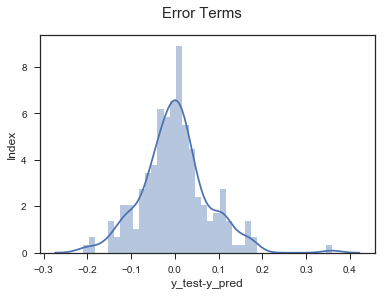

In [42]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_sample-y_pred),bins=40)
fig.suptitle('Error Terms', fontsize=15)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=12)                  # X-label
plt.ylabel('Index', fontsize=12)                          # Y-label

In [43]:
mse = mean_squared_error(y_sample, y_pred)
r_squared = r2_score(y_sample, y_pred)

print(' MSE: {0} RSqr: {1}'.format(mse,r_squared))

 MSE: 0.0058099672784139985 RSqr: 0.8806532967996287


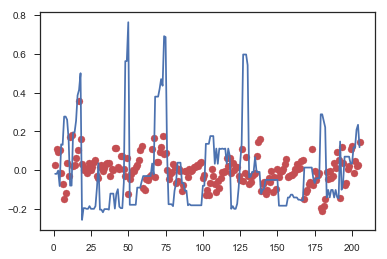

In [44]:
# Plotting predicted & error terms
plt.scatter(x,y_sample-y_pred,color='r')
plt.plot(x,y_pred,color='b')
plt.show()